In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs
import os 
%matplotlib inline 
import warnings 

In [4]:
loan=pd.read_csv('C:\\Users\\notro\\OneDrive\\Desktop\\Echo\\VS Code Project Files\\Data Science\\financial_loan.csv')
loan.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership  issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  11-02-2021            13-09-2021        13-04-2021   
1     E           RENT  01-01-2021            14-12-2021        15-01-2021   
2     C           RENT  05-01-2021            12-12-2021        09-01-2021   
3     B       MORTGAGE  25-02-2021            12-12-2021        12-03-2021   
4     A       MORTGAGE  01-01-2021            14-12-2021        15-01-2021   

   ... sub_grade        term  verification_status annual_income     dti  \
0  ...        C4   60 months      Source Verified       30000.0  0.0100   
1  ...        E1   36 months      Source Verified       48000.0  0.0535   
2  ...        C5   36 months         Not Verified       50000.0  0.2088   
3  ...        B2   60 months      Source Verified       42000.0  0.0540   
4  ...        A1   36 months             Verified       83000.0  0.0231   

  installment int_rate  loan_amount  total_acc  total_payment  
0       59.83   0.1527         2500          4           1009  
1      109.43   0.1864         3000          4           3939  
2      421.65   0.1596        12000         11           3522  
3       97.06   0.1065         4500          9           4911  
4      106.53   0.0603         3500         28           3835  

[5 rows x 24 columns]

In [25]:
loan.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [23]:
loan.shape

(38576, 24)

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [24]:
loan.isna().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [5]:
print(loan['emp_title'].isnull().sum())

1438


In [6]:
print(loan['emp_title'].nunique())

28525


In [27]:
loan.isna().sum()

id                       0
address_state            0
application_type         0
emp_length               0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

In [29]:
loan.select_dtypes('number').columns

Index(['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment'],
      dtype='object')

In [32]:
loan.select_dtypes('O')

address_state application_type emp_length grade home_ownership  \
0                GA       INDIVIDUAL   < 1 year     C           RENT   
1                CA       INDIVIDUAL    9 years     E           RENT   
2                CA       INDIVIDUAL    4 years     C           RENT   
3                TX       INDIVIDUAL   < 1 year     B       MORTGAGE   
4                IL       INDIVIDUAL  10+ years     A       MORTGAGE   
...             ...              ...        ...   ...            ...   
38571            NJ       INDIVIDUAL   < 1 year     C       MORTGAGE   
38572            NY       INDIVIDUAL    8 years     C           RENT   
38573            CA       INDIVIDUAL    5 years     D           RENT   
38574            NY       INDIVIDUAL    5 years     D           RENT   
38575            NY       INDIVIDUAL    4 years     F           RENT   

       issue_date last_credit_pull_date last_payment_date  loan_status  \
0      11-02-2021            13-09-2021        13-04-2021  Charged Off   
1      01-01-2021            14-12-2021        15-01-2021   Fully Paid   
2      05-01-2021            12-12-2021        09-01-2021  Charged Off   
3      25-02-2021            12-12-2021        12-03-2021   Fully Paid   
4      01-01-2021            14-12-2021        15-01-2021   Fully Paid   
...           ...                   ...               ...          ...   
38571  11-07-2021            16-05-2021        16-05-2021      Current   
38572  11-10-2021            16-04-2021        16-05-2021      Current   
38573  11-09-2021            16-05-2021        16-05-2021      Current   
38574  11-10-2021            16-05-2021        16-05-2021      Current   
38575  11-07-2021            16-05-2021        16-05-2021      Current   

      next_payment_date  purpose sub_grade        term verification_status  
0            13-05-2021      car        C4   60 months     Source Verified  
1            15-02-2021      car        E1   36 months     Source Verified  
2            09-02-2021      car        C5   36 months        Not Verified  
3            12-04-2021      car        B2   60 months     Source Verified  
4            15-02-2021      car        A1   36 months            Verified  
...                 ...      ...       ...         ...                 ...  
38571        16-06-2021  wedding        C1   60 months            Verified  
38572        16-06-2021  wedding        C1   60 months            Verified  
38573        16-06-2021  wedding        D5   60 months            Verified  
38574        16-06-2021  wedding        D5   60 months            Verified  
38575        16-06-2021  wedding        F3   60 months            Verified  

[38576 rows x 14 columns]

In [33]:
loan.select_dtypes('O').columns

Index(['address_state', 'application_type', 'emp_length', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'purpose',
       'sub_grade', 'term', 'verification_status'],
      dtype='object')

In [14]:
# Convert date columns to datetime 
date_columns = ['issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']
for col in date_columns:
    loan[col] = pd.to_datetime(loan[col], format='%d-%m-%Y')


In [59]:
loan['loan_amount'].max()

35000

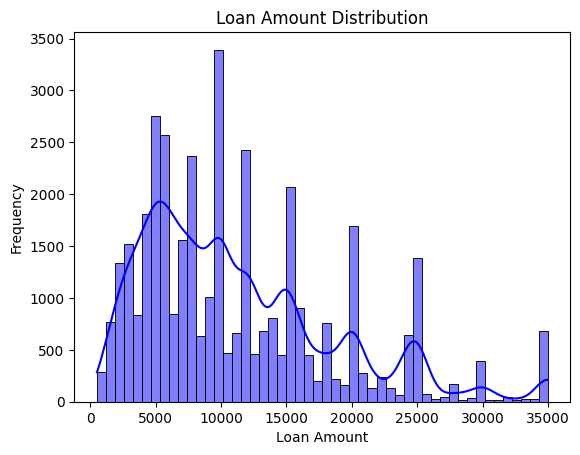

In [62]:
# This graph shows the most common loan amounts and their frequencies
sns.histplot(loan['loan_amount'], bins=50, kde=True, color='blue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Loan Status')

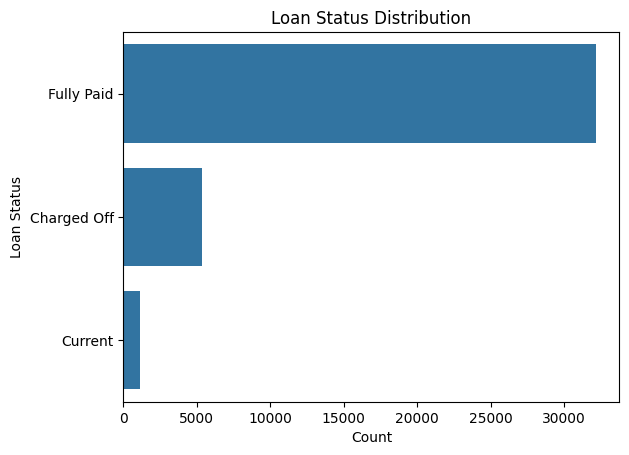

In [66]:
sns.countplot(y='loan_status', data=loan, order=loan['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')

Text(0.5, 1.0, 'Count of grade')

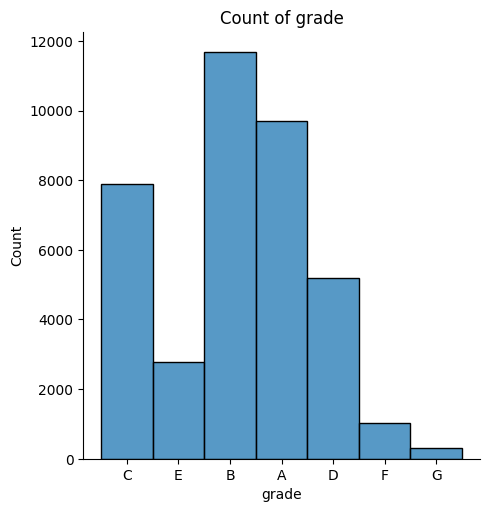

In [63]:
sns.displot(loan['grade'])
plt.title('Count of grade')

In [2]:
# pip install ydata_profiling

In [1]:
# pip install ipywidgets

In [70]:
import pandas as pd
from ydata_profiling import ProfileReport

# df = pd.read_csv("data/Train_Dataset.csv")
profile = ProfileReport(loan, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


<Axes: xlabel='count', ylabel='application_type'>

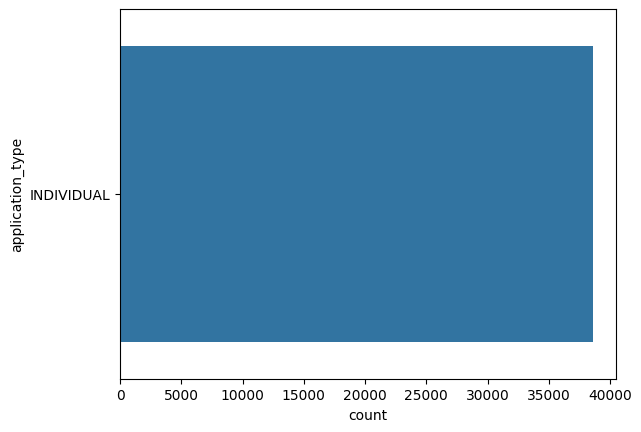

In [76]:
sns.countplot(y='application_type', data=loan, order=loan['application_type'].value_counts().index)

In [90]:
loan.select_dtypes('number')

id  member_id  annual_income     dti  installment  int_rate  \
0      1077430    1314167        30000.0  0.0100        59.83    0.1527   
1      1072053    1288686        48000.0  0.0535       109.43    0.1864   
2      1069243    1304116        50000.0  0.2088       421.65    0.1596   
3      1041756    1272024        42000.0  0.0540        97.06    0.1065   
4      1068350    1302971        83000.0  0.0231       106.53    0.0603   
...        ...        ...            ...     ...          ...       ...   
38571   803452     992381       100000.0  0.1986       551.64    0.1299   
38572   970377    1192039        50000.0  0.0458       579.72    0.1349   
38573   875376    1089898        65000.0  0.1734       627.93    0.1749   
38574   972997    1194971       368000.0  0.0009       612.72    0.1825   
38575   682952     872217        80000.0  0.0600       486.86    0.2099   

       loan_amount  total_acc  total_payment  
0             2500          4           1009  
1             3000          4           3939  
2            12000         11           3522  
3             4500          9           4911  
4             3500         28           3835  
...            ...        ...            ...  
38571        24250         33          31946  
38572        25200         18          31870  
38573        25000         20          35721  
38574        24000          9          33677  
38575        18000          7          27679  

[38576 rows x 9 columns]

<Axes: ylabel='count'>

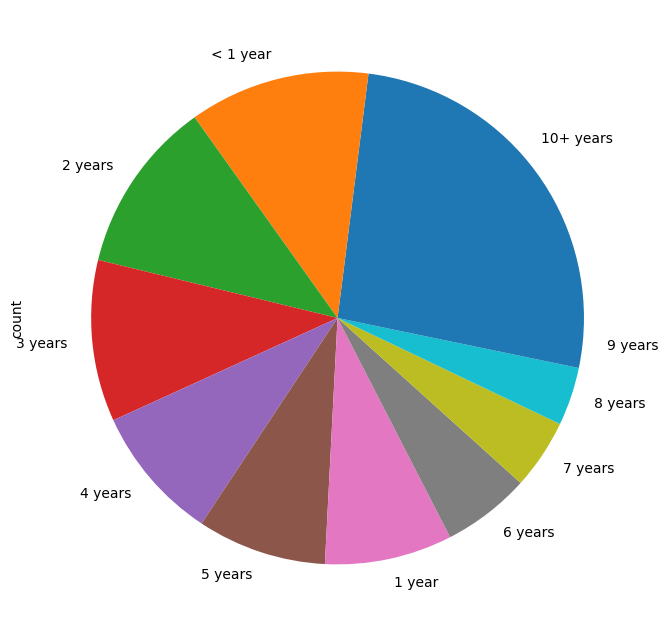

In [97]:
loan['emp_length'].value_counts().plot.pie(figsize=(10,8))

<Axes: xlabel='grade'>

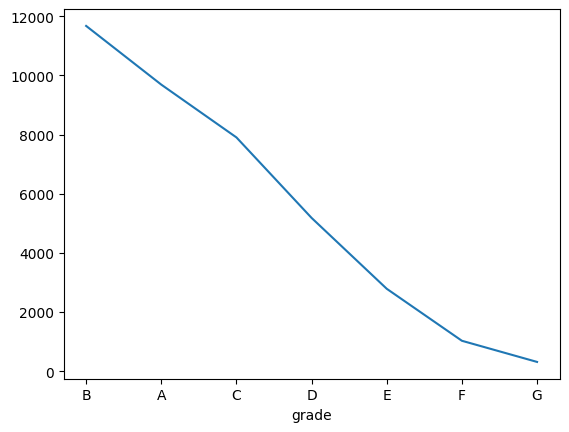

In [101]:
loan['grade'].value_counts().plot.line()

<Axes: xlabel='home_ownership'>

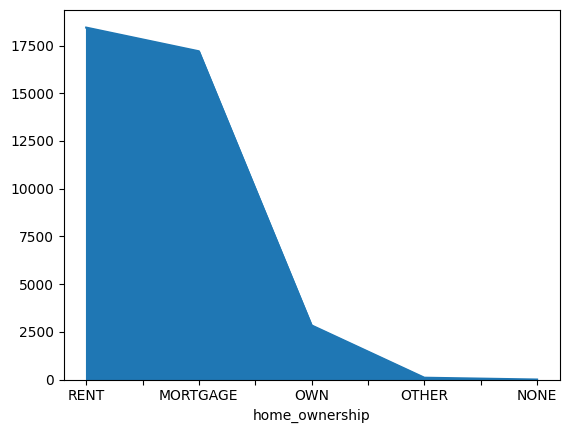

In [103]:
loan['home_ownership'].value_counts().plot.area()

<Axes: xlabel='count', ylabel='home_ownership'>

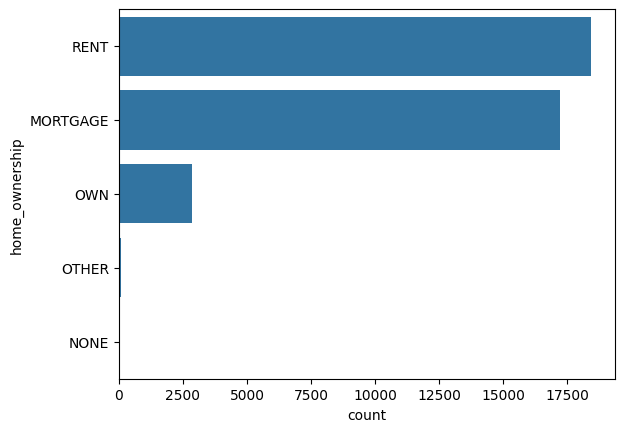

In [106]:
sns.countplot(y='home_ownership', data=loan, order=loan['home_ownership'].value_counts().index)

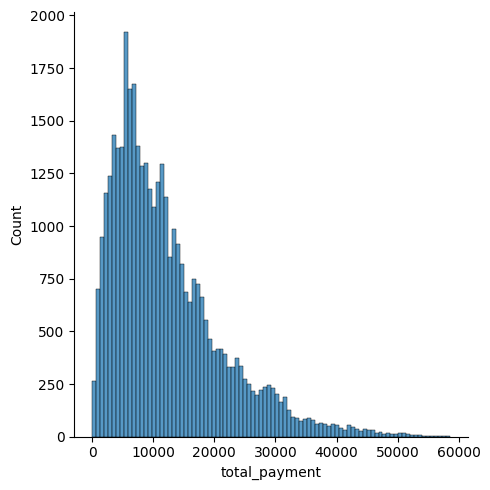

In [112]:
sns.displot(loan['total_payment'])

<Axes: xlabel='home_ownership', ylabel='loan_amount'>

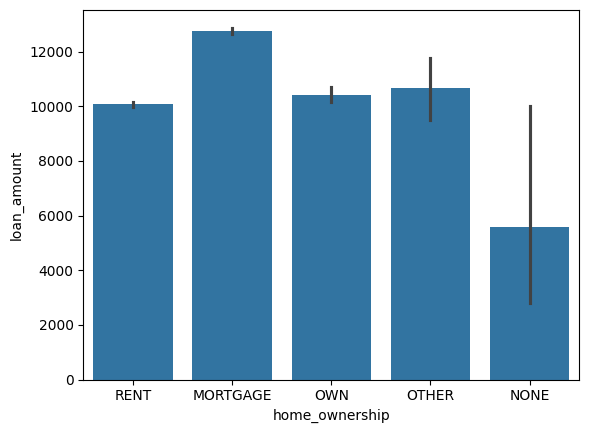

In [6]:
sns.barplot(x='home_ownership',y='loan_amount',data=loan,estimator=np.mean)

C:\Users\notro\AppData\Local\Temp\ipykernel_13556\313640467.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='grade',y='loan_amount',data=loan,palette='rainbow')


<Axes: xlabel='grade', ylabel='loan_amount'>

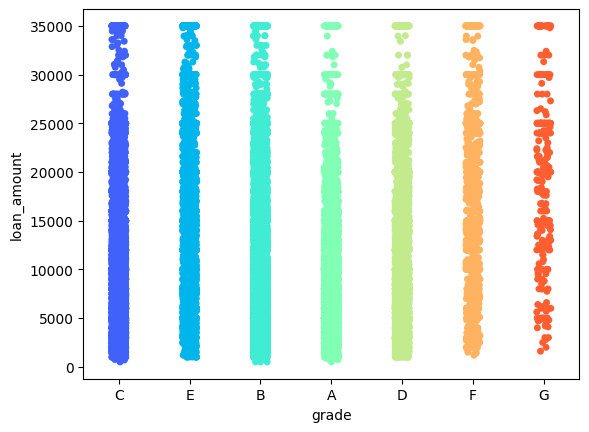

In [10]:
sns.stripplot(x='grade',y='loan_amount',data=loan,palette='rainbow')

<Axes: xlabel='grade', ylabel='loan_amount'>

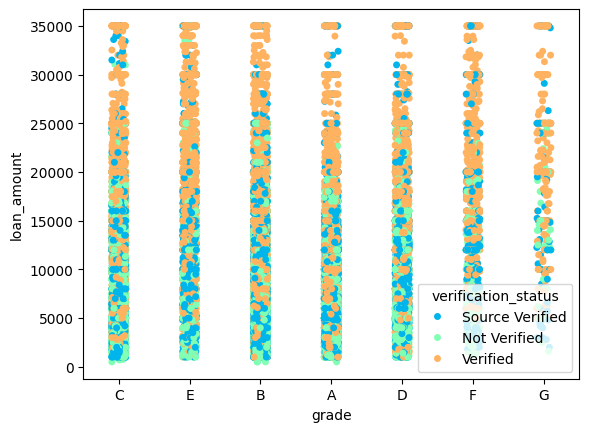

In [14]:
sns.stripplot(x='grade',y='loan_amount',hue='verification_status',data=loan,palette='rainbow')

C:\Users\notro\AppData\Local\Temp\ipykernel_13556\1470343006.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='purpose',y='loan_amount',data=loan,palette='rainbow')


<Axes: xlabel='purpose', ylabel='loan_amount'>

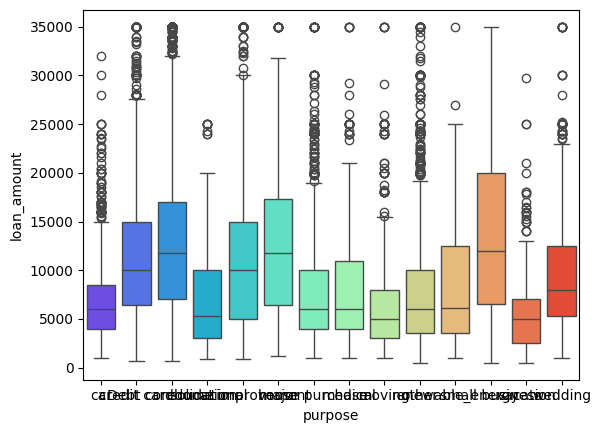

In [16]:
sns.boxplot(x='purpose',y='loan_amount',data=loan,palette='rainbow')

In [ ]:
loan['grade'].value_counts() #odinal encoding cause order in the categorical class

grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64

In [ ]:
loan['home_ownership'].value_counts() #label encoding cause categorical classes

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [ ]:
loan['purpose'].value_counts() #label encoding

purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

In [ ]:
loan['sub_grade'].value_counts() #odinal encoding because of ordering

sub_grade
B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
C1    2089
B2    1990
C2    1972
B1    1751
A3    1740
C3    1490
A2    1440
D2    1314
C4    1202
C5    1151
D3    1144
A1    1052
D4     960
D1     913
D5     851
E1     750
E2     640
E3     538
E4     448
E5     410
F1     325
F2     243
F3     182
F4     163
F5     115
G1     101
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [ ]:
loan['term'].value_counts() #split and make datatype as integer

term
36 months    28237
60 months    10339
Name: count, dtype: int64

In [ ]:
loan['verification_status'].value_counts() #label encoding

verification_status
Not Verified       16464
Verified           12335
Source Verified     9777
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [8]:
# Handle Missing Values
# Fill missing values in 'emp_title' with 'Unknown' (as it is a categorical feature)
loan['emp_title'] = loan['emp_title'].fillna('Unknown')

In [11]:
# # Fill missing values in numerical columns with their mean
# loan = loan.fillna(loan.mean())

In [12]:
# Ordinal encoding for 'grade' and 'sub_grade'
ordinal_features = ['grade', 'sub_grade']
ordinal_encoder = OrdinalEncoder()
loan[ordinal_features] = ordinal_encoder.fit_transform(loan[ordinal_features])

In [15]:
loan.select_dtypes('O').columns

Index(['address_state', 'application_type', 'emp_length', 'emp_title',
       'home_ownership', 'loan_status', 'purpose', 'term',
       'verification_status'],
      dtype='object')

In [24]:
#Label encoding for other categorical features
label_features = ['address_state','home_ownership', 'purpose', 'verification_status', 'loan_status','emp_title']
label_encoders = {}
for feature in label_features:
    encoder = LabelEncoder()
    loan[feature] = encoder.fit_transform(loan[feature])
    label_encoders[feature] = encoder

In [25]:
loan.head(3)

id  address_state application_type emp_length  emp_title  grade  \
0  1077430             10       INDIVIDUAL   < 1 year      18808    2.0   
1  1072053              4       INDIVIDUAL    9 years      13534    4.0   
2  1069243              4       INDIVIDUAL    4 years       4462    2.0   

   home_ownership issue_date last_credit_pull_date last_payment_date  ...  \
0               4 2021-02-11            2021-09-13        2021-04-13  ...   
1               4 2021-01-01            2021-12-14        2021-01-15  ...   
2               4 2021-01-05            2021-12-12        2021-01-09  ...   

   sub_grade        term  verification_status  annual_income     dti  \
0       13.0   60 months                    1        30000.0  0.0100   
1       20.0   36 months                    1        48000.0  0.0535   
2       14.0   36 months                    0        50000.0  0.2088   

  installment  int_rate  loan_amount  total_acc  total_payment  
0       59.83    0.1527         2500          4           1009  
1      109.43    0.1864         3000          4           3939  
2      421.65    0.1596        12000         11           3522  

[3 rows x 24 columns]

In [26]:
# Feature Selection 
features = ['annual_income', 'dti', 'loan_amount', 'int_rate', 'grade', 'sub_grade',
            'home_ownership', 'purpose', 'verification_status', 'emp_title']
target = 'loan_status'
X = loan[features]
y = loan[target]

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
loan['emp_title'].value_counts()

emp_title
23576    1438
22972     135
2328      109
10793      67
512        63
         ... 
7557        1
22084       1
22741       1
24507       1
1076        1
Name: count, Length: 28526, dtype: int64

In [29]:
X_train

annual_income     dti  loan_amount  int_rate  grade  sub_grade  \
25185        97000.0  0.0558        12000    0.1028    2.0       10.0   
33579        82000.0  0.1942        14000    0.1000    1.0        6.0   
13641        70032.0  0.1796        14000    0.0999    1.0        5.0   
38500       137400.0  0.1545        35000    0.1349    2.0       11.0   
2626         44000.0  0.2433         6400    0.0751    0.0        2.0   
...              ...     ...          ...       ...    ...        ...   
6265         42000.0  0.0583         6500    0.0788    0.0        4.0   
11284        60000.0  0.0458         4000    0.1099    1.0        7.0   
38158        30000.0  0.1776        10000    0.1253    2.0       10.0   
860          68000.0  0.1392         3500    0.0639    0.0        0.0   
15795       200000.0  0.0418        35000    0.1903    4.0       21.0   

       home_ownership  purpose  verification_status  emp_title  
25185               0        4                    0      27137  
33579               0        9                    1       5035  
13641               0        0                    1      20127  
38500               0       13                    2       6111  
2626                3        2                    0       8056  
...               ...      ...                  ...        ...  
6265                4        2                    2      22197  
11284               4        0                    0      14806  
38158               4       13                    1      11384  
860                 0        1                    2      21918  
15795               4        0                    1       2521  

[30860 rows x 10 columns]

In [30]:
# Model Training (For calculating Feature Importance)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
rf_model.score(X_test,y_test)

0.8267236910316226

In [31]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 emp_title              0.176192
dti                    0.175557
annual_income          0.161385
loan_amount            0.135743
int_rate               0.133492
sub_grade              0.070821
purpose                0.060235
verification_status    0.033610
home_ownership         0.030214
grade                  0.022750
dtype: float64


In [33]:
# Select the top important features 
top_features = feature_importance.head(6).index.tolist()
print("\nSelected Top Features:", top_features)


Selected Top Features: ['emp_title', 'dti', 'annual_income', 'loan_amount', 'int_rate', 'sub_grade']


In [35]:
# Train a new model using only the selected important features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [41]:
rf_model.score(X_test_top,y_test)

0.826075686884396

In [53]:
y_pred = rf_model.predict(X_test_top)

In [40]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.826075686884396

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.03      0.05      1064
           1       0.29      0.02      0.03       230
           2       0.84      0.99      0.91      6422

    accuracy                           0.83      7716
   macro avg       0.46      0.34      0.33      7716
weighted avg       0.74      0.83      0.76      7716



In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
    }


In [47]:
scores=[]

for modeln,obj in models.items():
    model=obj
    model.fit(X_train_top, y_train)
    y_pred = rf_model.predict(X_test_top)
    scores.append(accuracy_score(y_test, y_pred))

scores

[0.826075686884396,
 0.826075686884396,
 0.826075686884396,
 0.826075686884396,
 0.826075686884396]